# Practice notebook for hw 4
* Not part of final submission, pls refer "app_hw4.py" in the repo for final updates & shiny app implementation

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import geopandas

In [2]:
path = r'/Users/salonibhardwaj/Desktop/DAP_2_labs/Homeworks_2.0/homework-4-salonibhardwaj'

cta_shp = os.path.join(path, 'CTA_RailLines', 'CTA_RailLines.shp')

com_shp = os.path.join(path, 'Comm_20Areas__1_', 'CommAreas.shp')

df_cta = geopandas.read_file(cta_shp)

df_com = geopandas.read_file(com_shp)

In [3]:
def get_col(l):
    if 'Blue' in l:
        return 'b'
    elif 'Red' in l:
        return 'r'
    elif 'Purple' in l:
        return 'purple'
    elif 'Brown' in l:
        return 'brown'
    elif 'Yellow' in l:
        return 'yellow'
    elif 'Green' in l:
        return 'green'
    elif 'Pink' in l:
        return 'pink'
    elif 'Orange' in l:
        return 'orange'
    
color_dict = {l:get_col(l) for l in df_cta['LINES'].unique()}

Text(0.5, 1.0, 'Chicago Community Areas with "L" Lines')

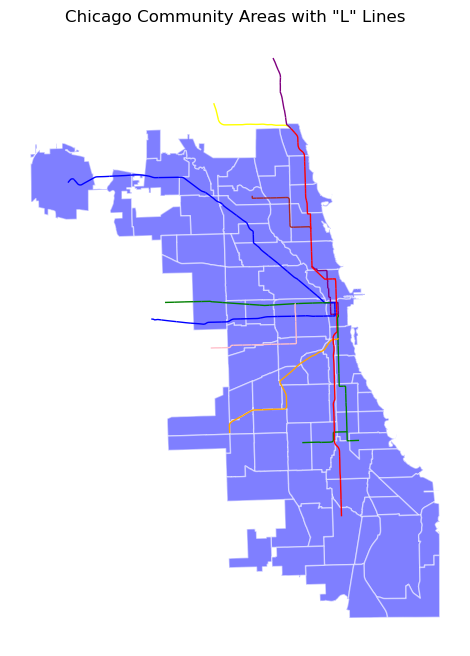

In [6]:
fig, ax = plt.subplots(figsize=(8,8))

df_com.plot(ax=ax, color='blue', alpha=0.5, edgecolor='white', label='Community Areas')
for line in df_cta['LINES'].unique():
    c = color_dict[line]
    df_cta[df_cta['LINES'] == line].plot(ax=ax, color=c, alpha=1, linewidth=1)

ax.axis('off')
ax.set_title('Chicago Community Areas with "L" Lines')

In [7]:
chi_covid = pd.read_csv(os.path.join(path, 'Chicago_COVID-19_Community_Vulnerability_Index__CCVI_.csv'))

chi_covid.head()

,Geography Type,Community Area or ZIP Code,Community Area Name,CCVI Score,CCVI Category,Rank - Socioeconomic Status,Rank - Household Composition and Disability,Rank - Adults with no PCP,Rank - Cumulative Mobility Ratio,Rank - Frontline Essential Workers,Rank - Age 65+,Rank - Comorbid Conditions,Rank - COVID-19 Incidence Rate,Rank - COVID-19 Hospital Admission Rate,Rank - COVID-19 Crude Mortality Rate,Location
0,CA,70,Ashburn,45.1,MEDIUM,34.0,32.0,28.0,45.0,48.0,29.0,33.0,59.0,66.0,39.0,POINT (-87.7083657043 41.7457577128)
1,ZIP,60625,NaN,25.5,LOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.701816 41.971155)
2,CA,1,Rogers Park,30.9,LOW,32.0,16.0,38.0,22.0,71.0,7.0,50.0,35.0,35.0,14.0,POINT (-87.6701668569 42.0096228806)
3,ZIP,60612,NaN,31.7,MEDIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.687011 41.88004)
4,ZIP,60641,NaN,36.1,MEDIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.746791 41.946682)


In [8]:
chi_covid = chi_covid.iloc[:,0:4]
chi_covid = chi_covid.dropna()
chi_covid = chi_covid.reset_index()

In [9]:
chi_covid

,index,Geography Type,Community Area or ZIP Code,Community Area Name,CCVI Score
0,0,CA,70,Ashburn,45.1
1,2,CA,1,Rogers Park,30.9
2,5,CA,6,Lake View,5.2
3,7,CA,11,Jefferson Park,25.6
4,8,CA,57,Archer Heights,53.3
...,...,...,...,...,...
72,121,CA,5,North Center,4.0
73,126,CA,48,Calumet Heights,46.1
74,127,CA,16,Irving Park,30.3
75,128,CA,69,Greater Grand Crossing,46.0


In [10]:
chi_ph = pd.read_csv(os.path.join(path, 'Public_Health_Statistics_-_Selected_underlying_causes_of_death_in_Chicago__2006_2010_-_Historical.csv'))

chi_ph.head()

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010,Cumulative Deaths Rank,Average Annual Deaths 2006 - 2010,Average Crude Rate 2006 - 2010,Average Crude Rate Lower CI,Average Crude Rate Upper CI,Crude Rate Rank,Average Adjusted Rate 2006 - 2010,Average Adjusted Rate Lower CI,Average Adjusted Rate Upper CI,Adjusted Rate Rank,Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010,YPLL Rate RANK,WARNING
0,All Causes,1,Rogers Park,1741,22.0,348,614.2,585.3,643.1,51.0,895.2,852.2,939.3,29.0,7128,37.0,NaN
1,All Causes,2,West Ridge,2612,5.0,522,723.6,695.8,751.4,42.0,689.9,663.3,717.1,58.0,6123,49.0,NaN
2,All Causes,3,Uptown,2542,6.0,508,879.6,845.4,913.8,31.0,934.0,897.5,971.2,24.0,9147,31.0,NaN
3,All Causes,4,Lincoln Square,1108,40.0,222,547.0,514.8,579.2,60.0,698.7,657.4,741.3,53.0,5344,62.0,NaN
4,All Causes,5,North Center,690,59.0,138,433.0,400.7,465.3,68.0,681.2,630.1,734.3,61.0,4058,74.0,NaN


In [11]:
chi_ph = chi_ph.loc[chi_ph['Cause of Death'] == 'All Causes']

chi_ph

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010,Cumulative Deaths Rank,Average Annual Deaths 2006 - 2010,Average Crude Rate 2006 - 2010,Average Crude Rate Lower CI,Average Crude Rate Upper CI,Crude Rate Rank,Average Adjusted Rate 2006 - 2010,Average Adjusted Rate Lower CI,Average Adjusted Rate Upper CI,Adjusted Rate Rank,Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010,YPLL Rate RANK,WARNING
0,All Causes,1,Rogers Park,1741,22.0,348,614.2,585.3,643.1,51.0,895.2,852.2,939.3,29.0,7128,37.0,NaN
1,All Causes,2,West Ridge,2612,5.0,522,723.6,695.8,751.4,42.0,689.9,663.3,717.1,58.0,6123,49.0,NaN
2,All Causes,3,Uptown,2542,6.0,508,879.6,845.4,913.8,31.0,934.0,897.5,971.2,24.0,9147,31.0,NaN
3,All Causes,4,Lincoln Square,1108,40.0,222,547.0,514.8,579.2,60.0,698.7,657.4,741.3,53.0,5344,62.0,NaN
4,All Causes,5,North Center,690,59.0,138,433.0,400.7,465.3,68.0,681.2,630.1,734.3,61.0,4058,74.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,All Causes,74,Mount Greenwood,755,51.0,151,793.1,736.5,849.7,37.0,752.0,698.7,807.2,39.0,4966,68.0,NaN
74,All Causes,75,Morgan Park,1251,34.0,250,1084.0,1023.9,1144.1,12.0,867.5,819.1,917.3,33.0,10531,27.0,NaN
75,All Causes,76,O'Hare,439,70.0,88,697.0,631.8,762.2,43.0,619.5,562.4,679.4,69.0,5368,61.0,NaN
76,All Causes,77,Edgewater,1975,11.0,395,685.1,654.9,715.3,46.0,673.2,643.5,703.5,63.0,6723,40.0,NaN


In [12]:
chi_ph = chi_ph.iloc[:,0:4]

chi_ph

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010
0,All Causes,1,Rogers Park,1741
1,All Causes,2,West Ridge,2612
2,All Causes,3,Uptown,2542
3,All Causes,4,Lincoln Square,1108
4,All Causes,5,North Center,690
...,...,...,...,...
73,All Causes,74,Mount Greenwood,755
74,All Causes,75,Morgan Park,1251
75,All Causes,76,O'Hare,439
76,All Causes,77,Edgewater,1975


In [13]:
chi_stats = pd.merge(chi_covid, chi_ph, how='outer', on='Community Area Name') 

In [163]:
chi_stats

,index,Geography Type,Community Area or ZIP Code,Community Area Name,CCVI Score,Cause of Death,Community Area,Cumulative Deaths 2006 - 2010
0,0.0,CA,70.0,Ashburn,45.1,All Causes,70.0,1524.0
1,2.0,CA,1.0,Rogers Park,30.9,All Causes,1.0,1741.0
2,5.0,CA,6.0,Lake View,5.2,All Causes,6.0,1914.0
3,7.0,CA,11.0,Jefferson Park,25.6,All Causes,11.0,1175.0
4,8.0,CA,57.0,Archer Heights,53.3,All Causes,57.0,424.0
5,9.0,CA,43.0,South Shore,45.6,All Causes,43.0,2919.0
6,10.0,CA,25.0,Austin,52.9,All Causes,25.0,4635.0
7,11.0,CA,38.0,Grand Boulevard,41.3,All Causes,38.0,1209.0
8,12.0,CA,26.0,West Garfield Park,47.4,All Causes,26.0,1002.0
9,13.0,CA,53.0,West Pullman,49.2,All Causes,53.0,1570.0


In [14]:
chi_stats = chi_stats.drop(labels=['index','Geography Type','Community Area or ZIP Code','Cause of Death', 'Community Area' ], axis=1)  # eliminating insignificant columns
chi_stats = chi_stats.dropna()
display(chi_stats)

,Community Area Name,CCVI Score,Cumulative Deaths 2006 - 2010
0,Ashburn,45.1,1524.0
1,Rogers Park,30.9,1741.0
2,Lake View,5.2,1914.0
3,Jefferson Park,25.6,1175.0
4,Archer Heights,53.3,424.0
...,...,...,...
72,North Center,4.0,690.0
73,Calumet Heights,46.1,867.0
74,Irving Park,30.3,1542.0
75,Greater Grand Crossing,46.0,2094.0


In [15]:
chi_stats = chi_stats.dropna()
display(chi_stats)

,Community Area Name,CCVI Score,Cumulative Deaths 2006 - 2010
0,Ashburn,45.1,1524.0
1,Rogers Park,30.9,1741.0
2,Lake View,5.2,1914.0
3,Jefferson Park,25.6,1175.0
4,Archer Heights,53.3,424.0
...,...,...,...
72,North Center,4.0,690.0
73,Calumet Heights,46.1,867.0
74,Irving Park,30.3,1542.0
75,Greater Grand Crossing,46.0,2094.0


In [16]:
df_com['COMMUNITY'] = df_com['COMMUNITY'].str.title()

df_com.head()

,AREA,PERIMETER,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,geometry
0,0.0,0.0,0,0,35,Douglas,35,4.600462e+07,31027.054510,"POLYGON ((1181573.250 1886828.040, 1181571.200..."
1,0.0,0.0,0,0,36,Oakland,36,1.691396e+07,19565.506153,"POLYGON ((1186289.356 1876750.733, 1186247.037..."
2,0.0,0.0,0,0,37,Fuller Park,37,1.991670e+07,25339.089750,"POLYGON ((1176344.998 1871187.546, 1176346.500..."
3,0.0,0.0,0,0,38,Grand Boulevard,38,4.849250e+07,28196.837157,"POLYGON ((1182322.043 1876674.731, 1182323.670..."
4,0.0,0.0,0,0,39,Kenwood,39,2.907174e+07,23325.167906,"POLYGON ((1186289.356 1876750.733, 1186290.775..."


In [17]:
gis_chi_stats = pd.merge(chi_stats, df_com, how='outer', left_on='Community Area Name', right_on='COMMUNITY')

In [18]:
gis_chi_stats.head()

,Community Area Name,CCVI Score,Cumulative Deaths 2006 - 2010,AREA,PERIMETER,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,geometry
0,Ashburn,45.1,1524.0,0.0,0.0,0.0,0.0,70,Ashburn,70,1.354603e+08,54818.154632,"POLYGON ((1153627.375 1854775.750, 1153635.750..."
1,Rogers Park,30.9,1741.0,0.0,0.0,0.0,0.0,1,Rogers Park,1,5.125990e+07,34052.397576,"POLYGON ((1168756.115 1942653.009, 1168435.059..."
2,Lake View,5.2,1914.0,0.0,0.0,0.0,0.0,6,Lake View,6,8.721480e+07,51973.096868,"POLYGON ((1172562.017 1926880.630, 1172565.350..."
3,Jefferson Park,25.6,1175.0,0.0,0.0,0.0,0.0,11,Jefferson Park,11,6.486816e+07,44011.957170,"POLYGON ((1142170.617 1931452.395, 1142128.720..."
4,Archer Heights,53.3,424.0,0.0,0.0,0.0,0.0,57,Archer Heights,57,5.592251e+07,31880.021029,"POLYGON ((1152950.120 1879807.143, 1152953.209..."


In [19]:
def make_choropleth(select):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)

    ##data = gis_chi_stats.loc[gis_chi_stats['Year'] == year]
    ax = gis_chi_stats.plot(ax=ax, column=select, legend=True, cax=cax, edgecolor='black', cmap="OrRd")
    ax.axis('off')
    ax.set_title('Some stats for chi')

options = ['CCVI Score', 'Cumulative Deaths 2006 - 2010' ]

In [20]:
from geopandas import GeoDataFrame
gis_chi_stats = GeoDataFrame(gis_chi_stats) 

In [21]:
from ipywidgets import interact, interact_manual
@interact(parameter=options)
def make_plot_for(parameter=options[0]):
    plot = make_choropleth(parameter)

interactive(children=(Dropdown(description='parameter', options=('CCVI Score', 'Cumulative Deaths 2006 - 2010'…